In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split
from probabilistic_model import ProbabilisticModel
from nn import NeuralNetwork
import numpy as np

## Testing the probabilistic neural network with a small dataset

In [2]:
X = np.random.randn(1000, 2)
y = np.tanh(X[:, 0], + X[:, 1])
y = 1. / (1. + np.exp(-(y + y)))
y = y > 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

Fit a model for binary classiciation with 2 hidden units

In [3]:
p_model = ProbabilisticModel('binary', 2)
p_model.fit(X_train, Y_train, 100000, 50000)

 [-----------------100%-----------------] 100000 of 100000 complete in 31.3 sec

In [4]:
p_model.evaluate(X_test, Y_test)

0.996

### Sanity Check

In [5]:
w1_trace = p_model.mcmc.trace('w_in_1')[:]
w12_trace = p_model.mcmc.trace('w_1_2')[:]
w2_trace = p_model.mcmc.trace('w_2_out')[:]

In [6]:
def plot_weights(weights):
    for i, weight in enumerate(weights):
        weight = np.moveaxis(weight, 1, 0)
        fig, ax = plt.subplots(weight.shape[0], figsize=(10, 15))
        for j, w in enumerate(weight):
            ax[j].set_title(f'w{i + 1}{j + 1}')
            ax[j].hist(w)

        plt.show()

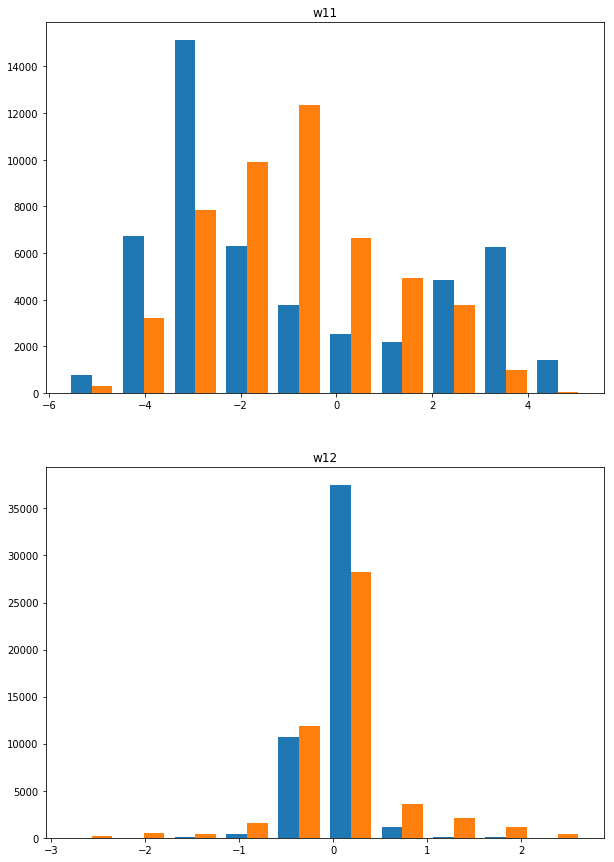

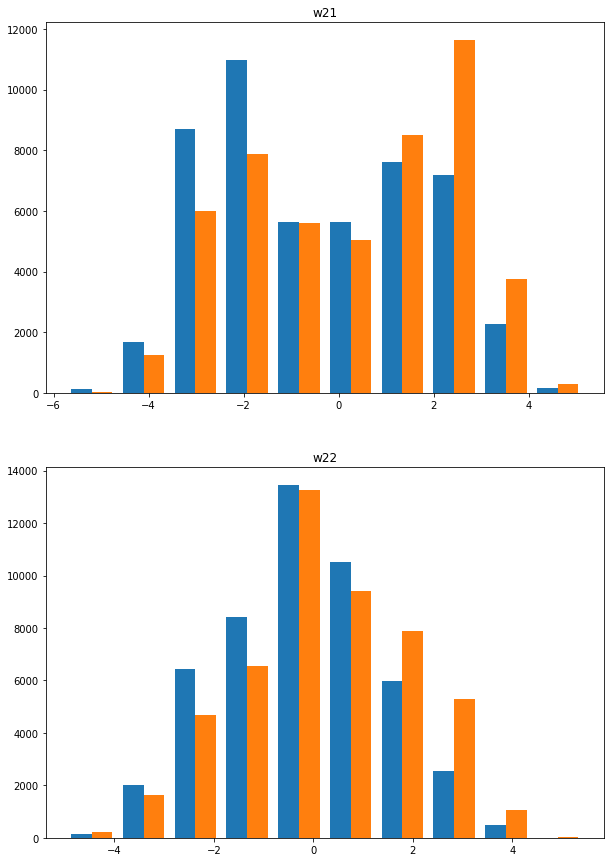

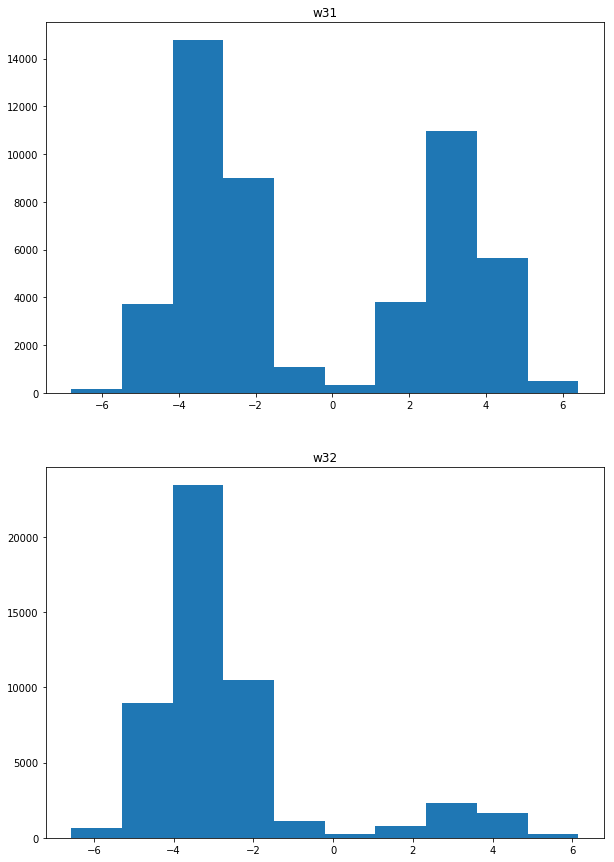

In [7]:
plot_weights([w1_trace, w12_trace, w2_trace])

Comparing to a neural network

In [8]:
nn = NeuralNetwork('binary', 2)
nn.fit(X_train, Y_train, epochs=50, validation_split=0.2)
score = nn.evaluate(X_test, Y_test)
print(score)

Train on 600 samples, validate on 150 samples
Epoch 1/50
600/600 [==============================] - 0s 310us/step - loss: 0.7467 - acc: 0.3017 - val_loss: 0.7417 - val_acc: 0.2600
Epoch 2/50
600/600 [==============================] - 0s 21us/step - loss: 0.7319 - acc: 0.3317 - val_loss: 0.7274 - val_acc: 0.3000
Epoch 3/50
600/600 [==============================] - 0s 23us/step - loss: 0.7177 - acc: 0.3600 - val_loss: 0.7133 - val_acc: 0.3667
Epoch 4/50
600/600 [==============================] - 0s 22us/step - loss: 0.7040 - acc: 0.3967 - val_loss: 0.6998 - val_acc: 0.3933
Epoch 5/50
600/600 [==============================] - 0s 21us/step - loss: 0.6907 - acc: 0.4383 - val_loss: 0.6864 - val_acc: 0.4733
Epoch 6/50
600/600 [==============================] - 0s 21us/step - loss: 0.6777 - acc: 0.5067 - val_loss: 0.6737 - val_acc: 0.5133
Epoch 7/50
600/600 [==============================] - 0s 22us/step - loss: 0.6652 - acc: 0.5500 - val_loss: 0.6609 - val_acc: 0.6267
Epoch 8/50
600/600 [==

The model overfitted. It needs more data to have good results

### Moons dataset

In [9]:
X, y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [10]:
p_model = ProbabilisticModel('binary', 10)
p_model.fit(X_train, Y_train, 100000, 50000)

 [-----------------100%-----------------] 100000 of 100000 complete in 78.2 sec

In [11]:
p_model.evaluate(X_test, Y_test)

0.916

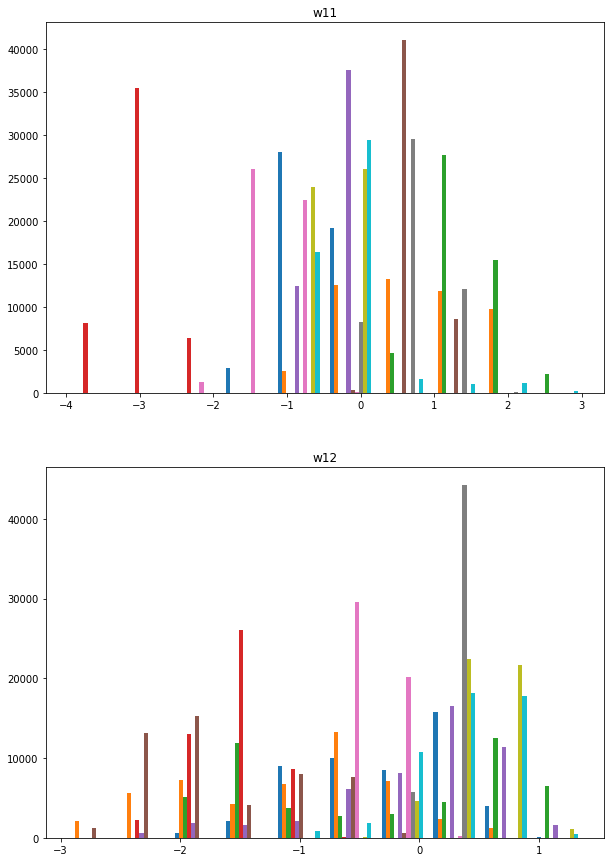

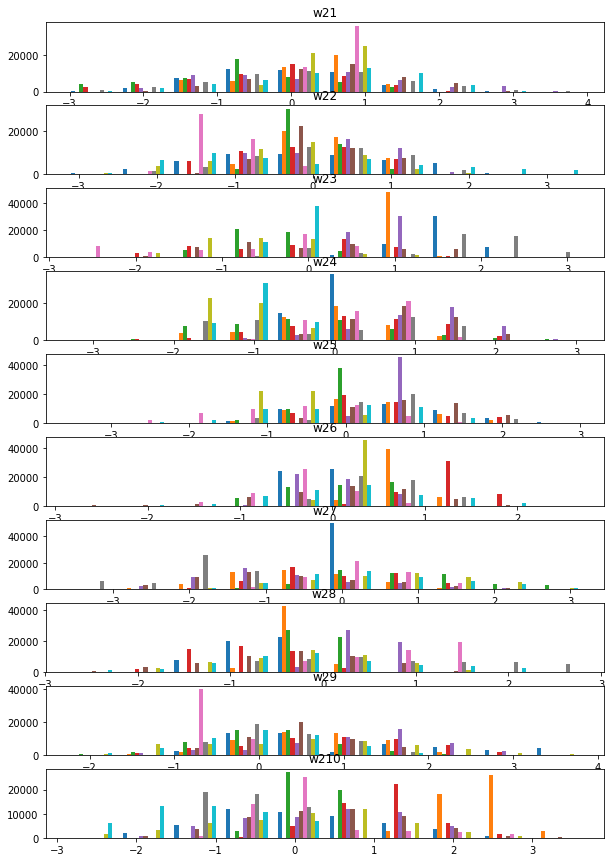

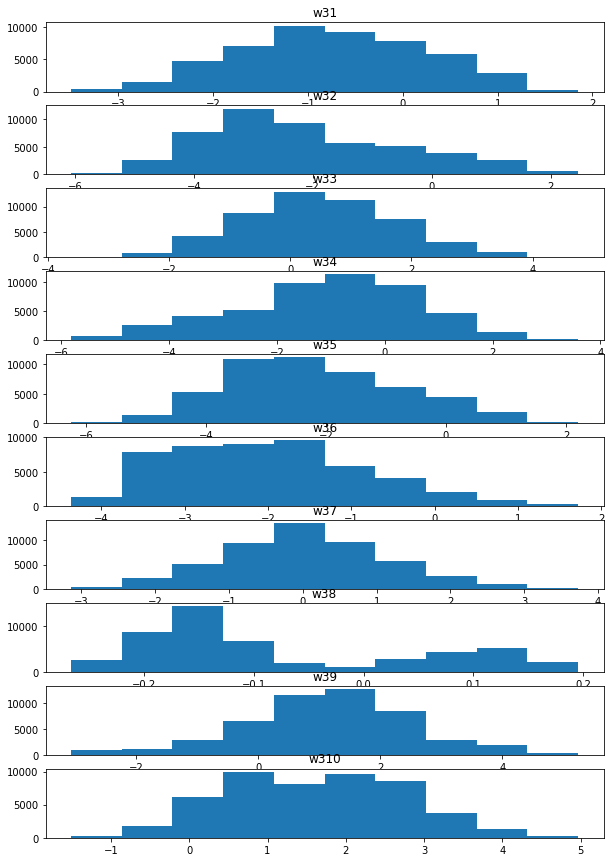

In [12]:
w1_trace = p_model.mcmc.trace('w_in_1')[:]
w12_trace = p_model.mcmc.trace('w_1_2')[:]
w2_trace = p_model.mcmc.trace('w_2_out')[:]
plot_weights([w1_trace, w12_trace, w2_trace])

In [13]:
nn = NeuralNetwork('binary', 10)
nn.fit(X_train, Y_train, epochs=100, validation_split=0.2)
score = nn.evaluate(X_test, Y_test)
print(score)

Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 322us/step - loss: 0.7687 - acc: 0.5333 - val_loss: 0.6838 - val_acc: 0.6333
Epoch 2/100
600/600 [==============================] - 0s 24us/step - loss: 0.7324 - acc: 0.5433 - val_loss: 0.6620 - val_acc: 0.6400
Epoch 3/100
600/600 [==============================] - 0s 21us/step - loss: 0.7009 - acc: 0.5650 - val_loss: 0.6452 - val_acc: 0.6600
Epoch 4/100
600/600 [==============================] - 0s 21us/step - loss: 0.6759 - acc: 0.5800 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 5/100
600/600 [==============================] - 0s 21us/step - loss: 0.6551 - acc: 0.6000 - val_loss: 0.6189 - val_acc: 0.6467
Epoch 6/100
600/600 [==============================] - 0s 24us/step - loss: 0.6374 - acc: 0.6233 - val_loss: 0.6082 - val_acc: 0.6733
Epoch 7/100
600/600 [==============================] - 0s 22us/step - loss: 0.6221 - acc: 0.6350 - val_loss: 0.5978 - val_acc: 0.6733
Epoch 8/100
600

600/600 [==============================] - 0s 22us/step - loss: 0.3398 - acc: 0.8383 - val_loss: 0.2647 - val_acc: 0.9000
Epoch 62/100
600/600 [==============================] - 0s 22us/step - loss: 0.3387 - acc: 0.8417 - val_loss: 0.2635 - val_acc: 0.9000
Epoch 63/100
600/600 [==============================] - 0s 21us/step - loss: 0.3377 - acc: 0.8433 - val_loss: 0.2622 - val_acc: 0.9000
Epoch 64/100
600/600 [==============================] - 0s 21us/step - loss: 0.3370 - acc: 0.8383 - val_loss: 0.2611 - val_acc: 0.9000
Epoch 65/100
600/600 [==============================] - 0s 22us/step - loss: 0.3358 - acc: 0.8467 - val_loss: 0.2593 - val_acc: 0.9000
Epoch 66/100
600/600 [==============================] - 0s 21us/step - loss: 0.3350 - acc: 0.8450 - val_loss: 0.2578 - val_acc: 0.9000
Epoch 67/100
600/600 [==============================] - 0s 21us/step - loss: 0.3342 - acc: 0.8433 - val_loss: 0.2566 - val_acc: 0.9000
Epoch 68/100
600/600 [==============================] - 0s 22us/step

The probabilistic model has better performance overall, acheiving a better accuracy with fewer hidden units and less data

## Multiclass Classification

In [14]:
X, y = load_iris(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [15]:
p_model = ProbabilisticModel('multiclass', 10)
p_model.fit(X_train, Y_train, 100000, 50000)

 [-----------------100%-----------------] 100000 of 100000 complete in 35.4 sec

In [16]:
p_model.evaluate(X_test, Y_test)

0.9473684210526315

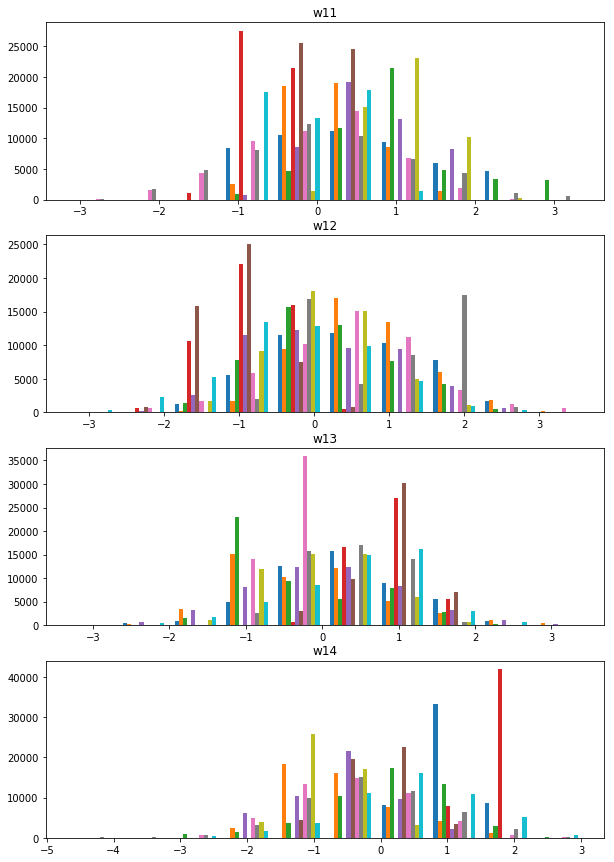

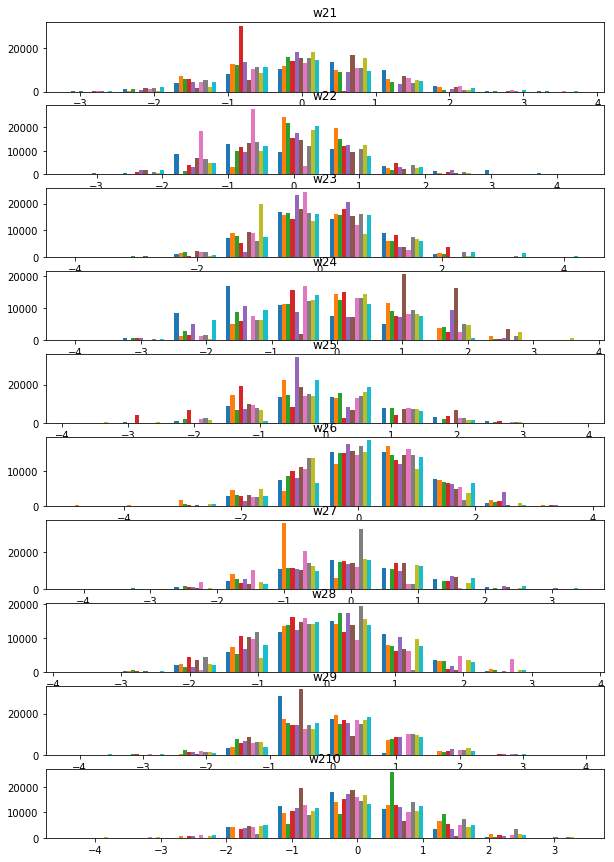

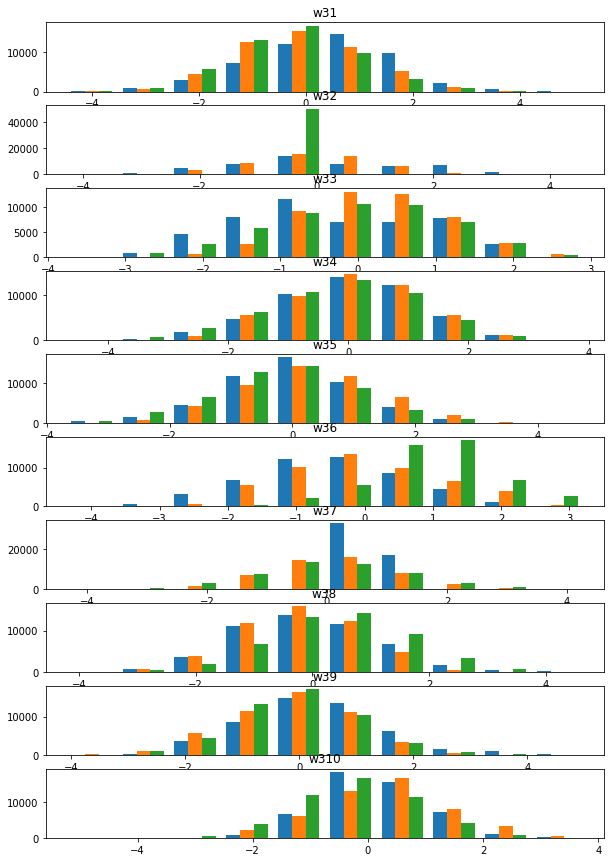

In [17]:
w1_trace = p_model.mcmc.trace('w_in_1')[:]
w12_trace = p_model.mcmc.trace('w_1_2')[:]
w2_trace = p_model.mcmc.trace('w_2_out')[:]
plot_weights([w1_trace, w12_trace, w2_trace])

In [18]:
nn = NeuralNetwork('multiclass', 10)
nn.fit(X_train, Y_train, epochs=1000, validation_split=0.2)
score = nn.evaluate(X_test, Y_test)
print(score)

Train on 89 samples, validate on 23 samples
Epoch 1/1000
89/89 [==============================] - 0s 2ms/step - loss: 1.1985 - acc: 0.3708 - val_loss: 1.2438 - val_acc: 0.3478
Epoch 2/1000
89/89 [==============================] - 0s 36us/step - loss: 1.1886 - acc: 0.3708 - val_loss: 1.2314 - val_acc: 0.3478
Epoch 3/1000
89/89 [==============================] - 0s 57us/step - loss: 1.1796 - acc: 0.3708 - val_loss: 1.2193 - val_acc: 0.3478
Epoch 4/1000
89/89 [==============================] - 0s 36us/step - loss: 1.1701 - acc: 0.3708 - val_loss: 1.2077 - val_acc: 0.3478
Epoch 5/1000
89/89 [==============================] - 0s 34us/step - loss: 1.1607 - acc: 0.3708 - val_loss: 1.1969 - val_acc: 0.3478
Epoch 6/1000
89/89 [==============================] - 0s 35us/step - loss: 1.1530 - acc: 0.3708 - val_loss: 1.1866 - val_acc: 0.3478
Epoch 7/1000
89/89 [==============================] - 0s 42us/step - loss: 1.1464 - acc: 0.3708 - val_loss: 1.1769 - val_acc: 0.3478
Epoch 8/1000
89/89 [======

Epoch 62/1000
89/89 [==============================] - 0s 27us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1021 - val_acc: 0.3478
Epoch 63/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1021 - val_acc: 0.3478
Epoch 64/1000
89/89 [==============================] - 0s 29us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1020 - val_acc: 0.3478
Epoch 65/1000
89/89 [==============================] - 0s 27us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1020 - val_acc: 0.3478
Epoch 66/1000
89/89 [==============================] - 0s 29us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1019 - val_acc: 0.3478
Epoch 67/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1019 - val_acc: 0.3478
Epoch 68/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1019 - val_acc: 0.3478
Epoch 69/1000
89/89 [==============================] - 0s 30us

Epoch 123/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 124/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1015 - val_acc: 0.3478
Epoch 125/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1015 - val_acc: 0.3478
Epoch 126/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 127/1000
89/89 [==============================] - 0s 37us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 128/1000
89/89 [==============================] - 0s 31us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 129/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 130/1000
89/89 [==============================] -

Epoch 184/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 185/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 186/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 187/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 188/1000
89/89 [==============================] - 0s 37us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 189/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 190/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 191/1000
89/89 [==============================] -

Epoch 245/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 246/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 247/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 248/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 249/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1016 - val_acc: 0.3478
Epoch 250/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 251/1000
89/89 [==============================] - 0s 48us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1016 - val_acc: 0.3478
Epoch 252/1000
89/89 [==============================] -

Epoch 306/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 307/1000
89/89 [==============================] - 0s 39us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 308/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 309/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 310/1000
89/89 [==============================] - 0s 31us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 311/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 312/1000
89/89 [==============================] - 0s 44us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 313/1000
89/89 [==============================] -

Epoch 367/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 368/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 369/1000
89/89 [==============================] - 0s 38us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 370/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 371/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 372/1000
89/89 [==============================] - 0s 43us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 373/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 374/1000
89/89 [==============================] -

Epoch 428/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 429/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 430/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 431/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 432/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 433/1000
89/89 [==============================] - 0s 31us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1015 - val_acc: 0.3478
Epoch 434/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 435/1000
89/89 [==============================] -

Epoch 489/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 490/1000
89/89 [==============================] - 0s 37us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 491/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 492/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 493/1000
89/89 [==============================] - 0s 43us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 494/1000
89/89 [==============================] - 0s 42us/step - loss: 1.0955 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 495/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1012 - val_acc: 0.3478
Epoch 496/1000
89/89 [==============================] -

Epoch 550/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1022 - val_acc: 0.3478
Epoch 551/1000
89/89 [==============================] - 0s 44us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1021 - val_acc: 0.3478
Epoch 552/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1020 - val_acc: 0.3478
Epoch 553/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1019 - val_acc: 0.3478
Epoch 554/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1016 - val_acc: 0.3478
Epoch 555/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1016 - val_acc: 0.3478
Epoch 556/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1015 - val_acc: 0.3478
Epoch 557/1000
89/89 [==============================] -

Epoch 611/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 612/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 613/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 614/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 615/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 616/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 617/1000
89/89 [==============================] - 0s 44us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 618/1000
89/89 [==============================] -

Epoch 672/1000
89/89 [==============================] - 0s 32us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1009 - val_acc: 0.3478
Epoch 673/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 674/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 675/1000
89/89 [==============================] - 0s 39us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 676/1000
89/89 [==============================] - 0s 36us/step - loss: 1.0954 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 677/1000
89/89 [==============================] - 0s 45us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1009 - val_acc: 0.3478
Epoch 678/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 679/1000
89/89 [==============================] -

Epoch 733/1000
89/89 [==============================] - 0s 40us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1013 - val_acc: 0.3478
Epoch 734/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 735/1000
89/89 [==============================] - 0s 31us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1014 - val_acc: 0.3478
Epoch 736/1000
89/89 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 737/1000
89/89 [==============================] - 0s 39us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1017 - val_acc: 0.3478
Epoch 738/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 739/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1018 - val_acc: 0.3478
Epoch 740/1000
89/89 [==============================] -

Epoch 794/1000
89/89 [==============================] - 0s 37us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1008 - val_acc: 0.3478
Epoch 795/1000
89/89 [==============================] - 0s 34us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1009 - val_acc: 0.3478
Epoch 796/1000
89/89 [==============================] - 0s 33us/step - loss: 1.0956 - acc: 0.3708 - val_loss: 1.1009 - val_acc: 0.3478
Epoch 797/1000
89/89 [==============================] - 0s 35us/step - loss: 1.0953 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 798/1000
89/89 [==============================] - 0s 63us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 799/1000
89/89 [==============================] - 0s 50us/step - loss: 1.0952 - acc: 0.3708 - val_loss: 1.1011 - val_acc: 0.3478
Epoch 800/1000
89/89 [==============================] - 0s 44us/step - loss: 1.0951 - acc: 0.3708 - val_loss: 1.1010 - val_acc: 0.3478
Epoch 801/1000
89/89 [==============================] -

Epoch 855/1000
89/89 [==============================] - 0s 40us/step - loss: 0.8050 - acc: 0.6966 - val_loss: 0.8075 - val_acc: 0.6522
Epoch 856/1000
89/89 [==============================] - 0s 35us/step - loss: 0.8008 - acc: 0.6966 - val_loss: 0.8032 - val_acc: 0.6522
Epoch 857/1000
89/89 [==============================] - 0s 43us/step - loss: 0.7966 - acc: 0.6966 - val_loss: 0.7994 - val_acc: 0.6522
Epoch 858/1000
89/89 [==============================] - 0s 47us/step - loss: 0.7922 - acc: 0.6966 - val_loss: 0.7954 - val_acc: 0.6522
Epoch 859/1000
89/89 [==============================] - 0s 37us/step - loss: 0.7883 - acc: 0.6966 - val_loss: 0.7915 - val_acc: 0.6522
Epoch 860/1000
89/89 [==============================] - 0s 47us/step - loss: 0.7844 - acc: 0.6966 - val_loss: 0.7878 - val_acc: 0.6522
Epoch 861/1000
89/89 [==============================] - 0s 39us/step - loss: 0.7804 - acc: 0.6966 - val_loss: 0.7838 - val_acc: 0.6522
Epoch 862/1000
89/89 [==============================] -

Epoch 916/1000
89/89 [==============================] - 0s 38us/step - loss: 0.6500 - acc: 0.6966 - val_loss: 0.6592 - val_acc: 0.6522
Epoch 917/1000
89/89 [==============================] - 0s 46us/step - loss: 0.6485 - acc: 0.6966 - val_loss: 0.6578 - val_acc: 0.6522
Epoch 918/1000
89/89 [==============================] - 0s 40us/step - loss: 0.6470 - acc: 0.6966 - val_loss: 0.6564 - val_acc: 0.6522
Epoch 919/1000
89/89 [==============================] - 0s 35us/step - loss: 0.6457 - acc: 0.6966 - val_loss: 0.6551 - val_acc: 0.6522
Epoch 920/1000
89/89 [==============================] - 0s 40us/step - loss: 0.6442 - acc: 0.6966 - val_loss: 0.6537 - val_acc: 0.6522
Epoch 921/1000
89/89 [==============================] - 0s 45us/step - loss: 0.6427 - acc: 0.6966 - val_loss: 0.6523 - val_acc: 0.6522
Epoch 922/1000
89/89 [==============================] - 0s 41us/step - loss: 0.6414 - acc: 0.6966 - val_loss: 0.6510 - val_acc: 0.6522
Epoch 923/1000
89/89 [==============================] -

Epoch 977/1000
89/89 [==============================] - 0s 33us/step - loss: 0.5852 - acc: 0.6966 - val_loss: 0.5983 - val_acc: 0.6522
Epoch 978/1000
89/89 [==============================] - 0s 36us/step - loss: 0.5846 - acc: 0.6966 - val_loss: 0.5977 - val_acc: 0.6522
Epoch 979/1000
89/89 [==============================] - 0s 49us/step - loss: 0.5838 - acc: 0.6966 - val_loss: 0.5968 - val_acc: 0.6522
Epoch 980/1000
89/89 [==============================] - 0s 39us/step - loss: 0.5831 - acc: 0.6966 - val_loss: 0.5962 - val_acc: 0.6522
Epoch 981/1000
89/89 [==============================] - 0s 46us/step - loss: 0.5823 - acc: 0.6966 - val_loss: 0.5953 - val_acc: 0.6522
Epoch 982/1000
89/89 [==============================] - 0s 52us/step - loss: 0.5816 - acc: 0.6966 - val_loss: 0.5944 - val_acc: 0.6522
Epoch 983/1000
89/89 [==============================] - 0s 33us/step - loss: 0.5808 - acc: 0.6966 - val_loss: 0.5938 - val_acc: 0.6522
Epoch 984/1000
89/89 [==============================] -

The probabilistic model performed well on the multiclass dataset, with better results than a classic neural network.

## Conclusion

Bayesian Neural networks don't need that much data to generalize the data, while classical neural network overfitted. Also, the bayesian neural network have shorter training time.